# Credit Card Fraud Detection

***By Bo Tian***

**Oct. 28, 2020**

## Contents

* [1. Introduction](#1)
* [2. Exploratory Analysis](#2)
* [3. Train/Test Split](#3)
* [4. Modeling](#4)
    * [4.1 Logistic Regression and Support Vector Classifier](#4.1)
    * [4.2 Random Forest](#4.2)
* [5. Test Set Evaluation of the Best Model](#5)
* [6. Conclusion](#6)

# 1. Introduction
<a id='1'></a>

In this project we analyze a dataset of credit card transactions made over a two-day period in September 2013 by European cardholders. The dataset contains 284,807 transactions, of which 492 (0.17%) are fraudulent.

Each transaction has 30 features, all of which are numerical. The features `V1, V2, ..., V28` are the result of a PCA transformation. To protect confidentiality, background information on these features is not available. The `Time` feature contains the time elapsed since the first transaction, and the `Amount` feature contains the transaction amount. The response variable, `Class`, is 1 in the case of fraud, and 0 otherwise.

Our goal in this project is to construct models to predict whether a credit card transaction is fraudulent. We'll attempt a supervised learning approach. We'll also create visualizations to help us understand the structure of the data and unearth any interesting patterns.

# 2. Exploratory Analysis
<a id='2'></a>

In [1198]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Import csv file into a pandas dataframe.

In [1199]:
data = pd.read_csv("../input/creditcardfraud/creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Check basic metadata.

In [1200]:
data.shape

(284807, 31)

In [1201]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

We have seen that the PCA transformation changed the columns V1 to v28 numerical, securing the data anonymity.

Now let us check if there are missing values.

In [1202]:
## check for missing values
print('Number of missing data:', data.isnull().sum().max())

Number of missing data: 0


In [1203]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


The mean value for Amount is 88.35 and the majority of transactions were lower than 100.00, which is plausible. The standard deviation is 250.12 and we have a maximum transaction value of 25,691.16. Moreover, there are no missing values, so we are ready to move on.

Now, how common are fraudulent transactions?.

In [1204]:
print(data['Class'].value_counts())
print('\nPercentage of fraudulent activity: {:.2%}'.format((data[data['Class'] == 1].shape[0] / data.shape[0])))

0    284315
1       492
Name: Class, dtype: int64

Percentage of fraudulent activity: 0.17%


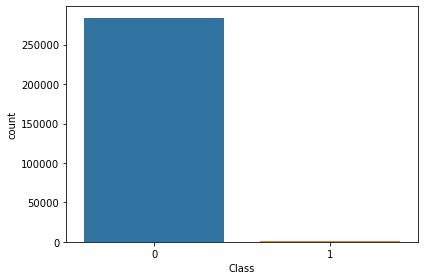

In [1205]:
fig, ax = plt.subplots(figsize=(6, 4))
ax = sns.countplot(x='Class', data=data)
plt.tight_layout()
plt.savefig('graph1.png')

We confirm how imbalanced our dataset is, with only 0.17% of fraudulent transactions.

Now let's examine the distribution of regular and fraudulent transactions over time.

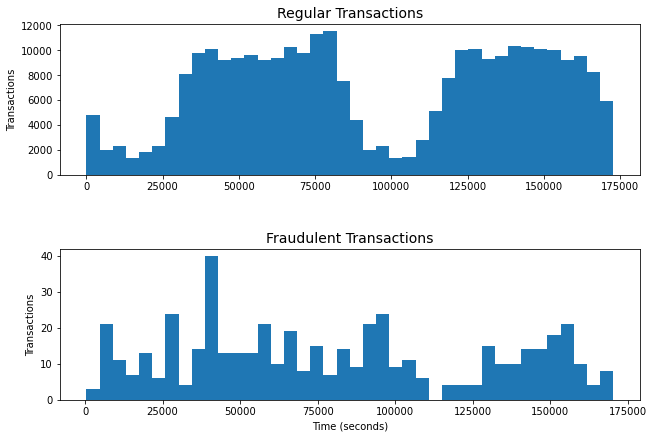

In [1206]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 7))

ax[0].hist(data['Time'][data['Class'] == 0], bins=40)
ax[0].set_title('Regular Transactions', fontsize=14)
ax[0].set_ylabel('Transactions')

ax[1].hist(data['Time'][data['Class'] == 1], bins=40)
ax[1].set_title('Fraudulent Transactions', fontsize=14)
ax[1].set_ylabel('Transactions')
ax[1].set_xlabel('Time (seconds)')

plt.tight_layout(pad=4.0)
plt.savefig('graph2.png')

Although the number of frauds is significantly smaller than the number of regular transactions, we can see a distinct behavior, especially around the 100,000 Time mark.

Notice that the number of regular transactions drops sharply around the 90,000th second mark, to surge again around the 110,000th second mark. It wouldn't be absurd to assume that this period is during the night when individuals naturally perform fewer purchases and transactions than during the daytime. On the other hand, a great number of fraudulent transactions occurred around the 100,000 mark, which could confirm the previous assumption, considering that criminals should prefer to commit fraud late at night, assuming there would be less surveillance.

Of course, this is just a hypothesis. Let's wait and see how our machine learning model will interpret these numbers.

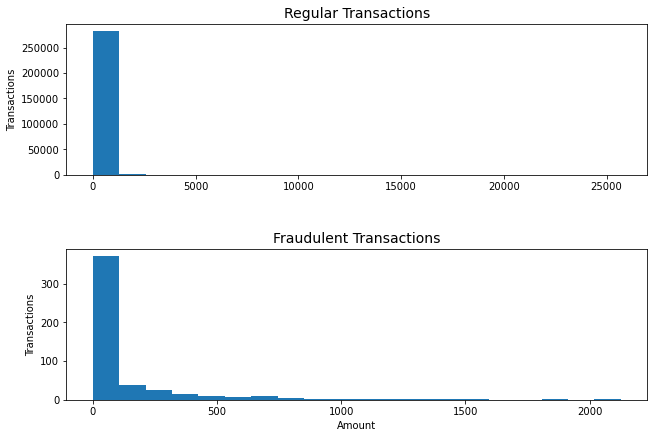

In [1207]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 7))

ax[0].hist(data['Amount'][data['Class'] == 0], bins=20)
ax[0].set_title('Regular Transactions', fontsize=14)
ax[0].set_ylabel('Transactions')

ax[1].hist(data['Amount'][data['Class'] == 1], bins=20)
ax[1].set_title('Fraudulent Transactions', fontsize=14)
ax[1].set_ylabel('Transactions')
ax[1].set_xlabel('Amount')

plt.tight_layout(pad=4.0)
plt.savefig('graph3.png')

As for the transactions' amount, apparently there is no significant insight we can gather from them. Most transactions, both regular and fraudulent, were of "small" values. As we saw earlier, the majority of the transactions were of less than 100,00.

Now let's plot a correlation matrix to determine the correlation between the variables.

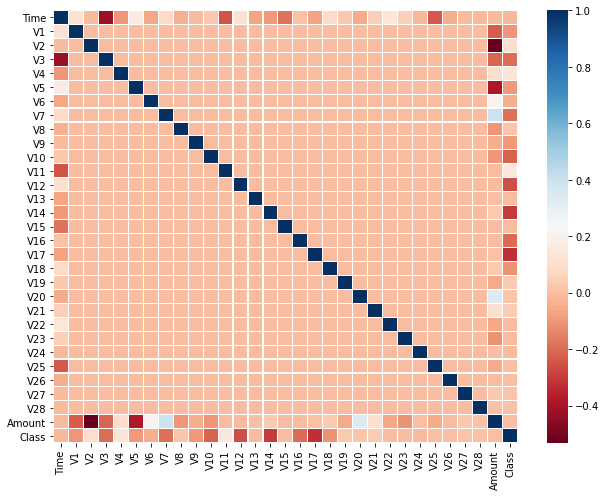

In [1208]:
corr = data.corr()
fig, ax = plt.subplots(figsize=(9, 7))

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.1, cmap="RdBu", ax=ax)
plt.tight_layout()
plt.savefig('graph4.png')

We did not observe any strong correlation between the variables.

Now let's start handling our machine learning model.

# 3. Train/Test Split
<a id='3'></a>

Before setting up the machine learning model, we need to follow three steps:

* Deal with the unbalanced dataset
* Split the dataset into train and test data

### Preprocessing

### Splitting into train and test data

After transforming the Amount and Time features, let's split our dataset into train and test data. The size of the test data is 0.2, the default value.

In [1209]:
from sklearn.model_selection import train_test_split

X = data.drop('Class', axis=1)
y = data['Class']

# train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

### Balancing the dataset

As we mentioned before, the dataset is highly imbalanced. Since there is a severe skew in the class distribution (284,315 entries in Class = 0 and 492 in Class = 1), our training dataset could be biased and influence the machine learning algorithm to display unsatisfactory results, for instance, ignoring the class with fewer entries.

To address the problem we will apply down-sampling method with the aid of RandomUnderSampler.


1    394
0    394
Name: Class, dtype: int64


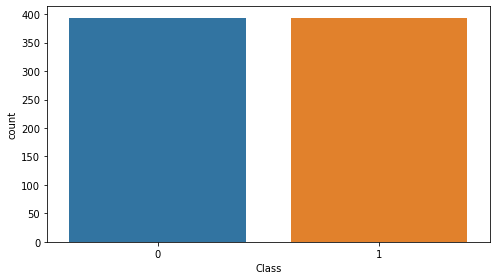

In [1210]:
from imblearn.under_sampling import RandomUnderSampler


rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_sample(X_train, y_train)

# check the balanced data
print(pd.Series(y_rus).value_counts())

# plot the new distribution
fig, ax = plt.subplots(figsize=(7, 4))
ax = sns.countplot(y_rus)
plt.tight_layout()
plt.savefig('graph5.png')

Now we have balanced data, with 351 entries for each class. Let's check the correlation matrix once again to see if we can determine some correlation.

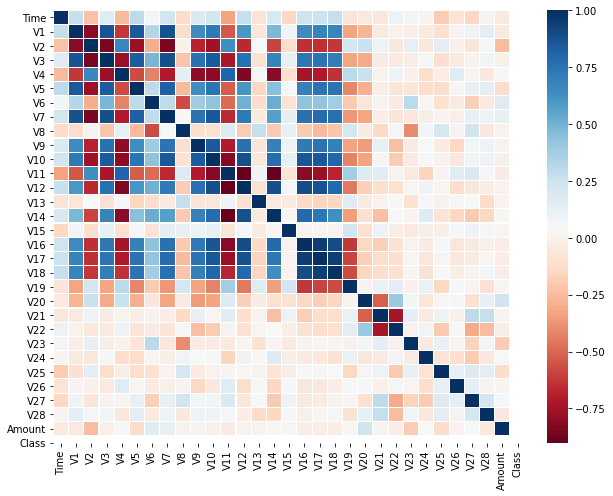

In [1211]:
from sklearn.tree import export_graphviz

corr_rus = pd.DataFrame(X_rus).corr()

fig, ax = plt.subplots(figsize=(9, 7))

sns.heatmap(corr_rus, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.1, cmap="RdBu", ax=ax)
plt.tight_layout()
plt.savefig('graph6.png')

Notice that with balanced data out correlation matrix shows meaningful correlations between some features, unlike the correlation matrix displayed earlier.

# 4. Modeling
<a id='6'></a>

Now we're ready to build machine learning models to predict whether a transaction is fraudulent. We'll train the following models:

* Logistic regression
* Support vector classifier
* Random forest

## 4.1 Logistic Regression and Support Vector Classifier
<a id='4.1'></a>

The class [`SGDClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html) implements multiple linear classifiers with SGD training, which makes learning much faster on large datasets. We'll implement the model as a machine learning pipeline that includes [`StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) for data standardization (rescaling each variable to zero mean and unit variance).

In [1212]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier

In [1213]:
# Always scale the input. The most convenient way is to use a pipeline.

pipeline_sgd = Pipeline([
    ('scaler', StandardScaler(copy=False)),
    ('model', SGDClassifier(max_iter=1000, tol=1e-3, random_state=1, warm_start=True))
])

We'll conduct a grid search over several hyperparameter choices. The search uses 5-fold cross-validation with stratified folds. The type of linear classifier is chosen with the `loss` hyperparameter. For a linear SVC we set `loss = 'hinge'`, and for logistic regression we set `loss = 'log'`.

Set the hyperparameter grids to search over, one grid for the linear SVC and one for logistic regression:

In [1214]:
param_grid_sgd = [{
    'model__loss': ['log'],
    'model__penalty': ['l1', 'l2'],
    'model__alpha': np.logspace(start=-3, stop=3, num=20)
}, {
    'model__loss': ['hinge'],
    'model__alpha': np.logspace(start=-3, stop=3, num=20),
    'model__class_weight': [None, 'balanced']
}]

In [1215]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer,recall_score, f1_score, confusion_matrix, classification_report, accuracy_score, roc_auc_score, roc_curve



In [1216]:
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'recall' : make_scorer(recall_score, average = 'micro'), 
       'f1_score' : make_scorer(f1_score, average = 'micro')}
grid_sgd = GridSearchCV(estimator=pipeline_sgd, param_grid=param_grid_sgd,  n_jobs=-1, pre_dispatch='2*n_jobs', cv=5, verbose=1, return_train_score=False)

Perform the grid search:

In [1217]:
import warnings
with warnings.catch_warnings(): # Suppress warnings from the matthews_corrcoef function
    warnings.simplefilter("ignore")
    grid_sgd.fit(X_rus, y_rus)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    4.8s finished


Mean cross-validated score of the best estimator found:

In [1218]:
grid_sgd.best_score_

0.9365879222768687

This is a pretty good MCC score---random guessing has a score of 0, and a perfect predictor has a score of 1. Now check the best hyperparameters found in the grid search:

In [1219]:
grid_sgd.best_params_

{'model__alpha': 0.004281332398719396,
 'model__loss': 'log',
 'model__penalty': 'l1'}

## 4.2 Random Forest
<a id='4.2'></a>

Next we'll try a random forest model, implemented in [`RandomForestClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).

In [1220]:
from sklearn.ensemble import RandomForestClassifier

We do not need to rescale the data for tree-based models, so our pipeline will simply consist of the random forest model. We'll leave the pipeline implementation in place in case we want to add preprocessing steps in the future.

In [1221]:
pipeline_rf = Pipeline([
    ('model', RandomForestClassifier(n_jobs=-1, random_state=1, class_weight="balanced"))
])

The random forest takes much longer to train on this fairly large dataset, so we don't actually do a hyperparameter grid search, only specifiying the number of estimators. We'll leave the grid search implemented in case we decide to try different hyperparameter values in the future.

In [1222]:
param_grid_rf = {
    'model__max_depth': [5, 10, 15, None],
    'model__max_features': ['sqrt'],
    'model__min_samples_leaf': [10, 20],
    'model__min_samples_split': [2, 5],
    'model__n_estimators': [50, 100, 200, 300, 500,1000]
}

scoring = {'accuracy' : make_scorer(accuracy_score), 
           'recall' : make_scorer(recall_score, average = 'micro'), 
       'f1_score' : make_scorer(f1_score, average = 'micro')}

grid_rf = GridSearchCV(estimator=pipeline_rf, param_grid=param_grid_rf, n_jobs=-1, pre_dispatch='2*n_jobs', cv=5, verbose=1, return_train_score=False)

In [1223]:
grid_rf.fit(X_rus, y_rus)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   17.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  4.3min finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('model',
                                        RandomForestClassifier(class_weight='balanced',
                                                               n_jobs=-1,
                                                               random_state=1))]),
             n_jobs=-1,
             param_grid={'model__max_depth': [5, 10, 15, None],
                         'model__max_features': ['sqrt'],
                         'model__min_samples_leaf': [10, 20],
                         'model__min_samples_split': [2, 5],
                         'model__n_estimators': [50, 100, 200, 300, 500, 1000]},
             verbose=1)

In [1224]:
grid_rf.best_score_

0.941651213416109

The random forest performed much better than the linear SVC, and without the need of any hyperparameter tuning.

# 5. Test Set Evaluation of the Best Model
<a id='5'></a>

According to the cross-validated MCC scores, the random forest is the best-performing model, so now let's evaluate its performance on the test set.

In [1225]:
from sklearn.metrics import confusion_matrix, classification_report, matthews_corrcoef, cohen_kappa_score, accuracy_score, average_precision_score, roc_auc_score

In [1226]:
# Initialize fit StandardScaler
std_scale = StandardScaler().fit(X_train)

def classification_eval(estimator, X_test, y_test):
    """
    Print several metrics of classification performance of an estimator, given features X_test and true labels y_test.
    
    Input: estimator or GridSearchCV instance, X_test, y_test
    Returns: text printout of metrics
    """
    X_test_std = std_scale.transform(X_test)
    y_pred = estimator.predict(X_test_std)
    
    # Number of decimal places based on number of samples
    dec = np.int64(np.ceil(np.log10(len(y_test))))
    
    print('CONFUSION MATRIX')
    print(confusion_matrix(y_test, y_pred), '\n')
    
    print('CLASSIFICATION REPORT')
    print(classification_report(y_test, y_pred, digits=dec))
    
    print('SCALAR METRICS')
    format_str = '%%13s = %%.%if' % dec
    print(format_str % ('MCC', matthews_corrcoef(y_test, y_pred)))
    if y_test.nunique() <= 2: # Additional metrics for binary classification
        try:
            y_score = estimator.predict_proba(X_test)[:,1]
        except:
            y_score = estimator.decision_function(X_test)
        print(format_str % ('AUPRC', average_precision_score(y_test, y_score)))
        print(format_str % ('AUROC', roc_auc_score(y_test, y_score)))
    print(format_str % ("Cohen's kappa", cohen_kappa_score(y_test, y_pred)))
    print(format_str % ('Accuracy', accuracy_score(y_test, y_pred)))

In [1227]:
classification_eval(grid_rf, X_test, y_test)

CONFUSION MATRIX
[[ 1634 55230]
 [    0    98]] 

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0    1.00000   0.02874   0.05587     56864
           1    0.00177   1.00000   0.00354        98

    accuracy                        0.03041     56962
   macro avg    0.50089   0.51437   0.02970     56962
weighted avg    0.99828   0.03041   0.05578     56962

SCALAR METRICS
          MCC = 0.00713
        AUPRC = 0.72334
        AUROC = 0.96820
Cohen's kappa = 0.00010
     Accuracy = 0.03041


In [1228]:
classification_eval(grid_sgd, X_test, y_test)

CONFUSION MATRIX
[[54111  2753]
 [    7    91]] 

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0    0.99987   0.95159   0.97513     56864
           1    0.03200   0.92857   0.06186        98

    accuracy                        0.95155     56962
   macro avg    0.51593   0.94008   0.51850     56962
weighted avg    0.99821   0.95155   0.97356     56962

SCALAR METRICS
          MCC = 0.16748
        AUPRC = 0.41102
        AUROC = 0.97753
Cohen's kappa = 0.05873
     Accuracy = 0.95155


In [1229]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier()
dummy.fit(X_rus, y_rus)

/opt/conda/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


DummyClassifier()

In [1230]:
import sklearn.metrics as metrics


def roc_scores(X_value, Y_value):
    #in sample
    model_list = [grid_sgd.best_estimator_, 
                  grid_rf.best_estimator_,
                  dummy
                 ]

    model_name = ['SGD','Random Forest','Dummy']

    # Plot ROC curve for all my models
    fig, ax = plt.subplots(figsize=(20,18))
    for i, model in enumerate(model_list):
        y_pred = list(model.predict_proba(X_value)[:,1])
        fpr, tpr, threshold = metrics.roc_curve(Y_value, y_pred)
        roc_auc = metrics.auc(fpr, tpr)
        plt.plot(fpr, tpr, label = (model_name[i] + ' AUC = %0.4f' % roc_auc),linewidth=2.0)
    ax.grid(False)
    ax.tick_params(length=6, width=2,labelsize = 30,
                   grid_color='r', grid_alpha=0.5)
    # plt.legend(loc = 'lower right',prop={'size': 25})
    leg = plt.legend(loc = 'lower right',prop={'size': 25})
    leg.get_frame().set_edgecolor('b')
    plt.title('Receiver Operating Characteristic (ROC)', FontSize=40)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([-.02, 1.02])
    plt.ylim([-.02, 1.02])
    plt.ylabel('True Positive Rate',FontSize=30)
    plt.xlabel('False Positive Rate',FontSize=30)
    plt.show()

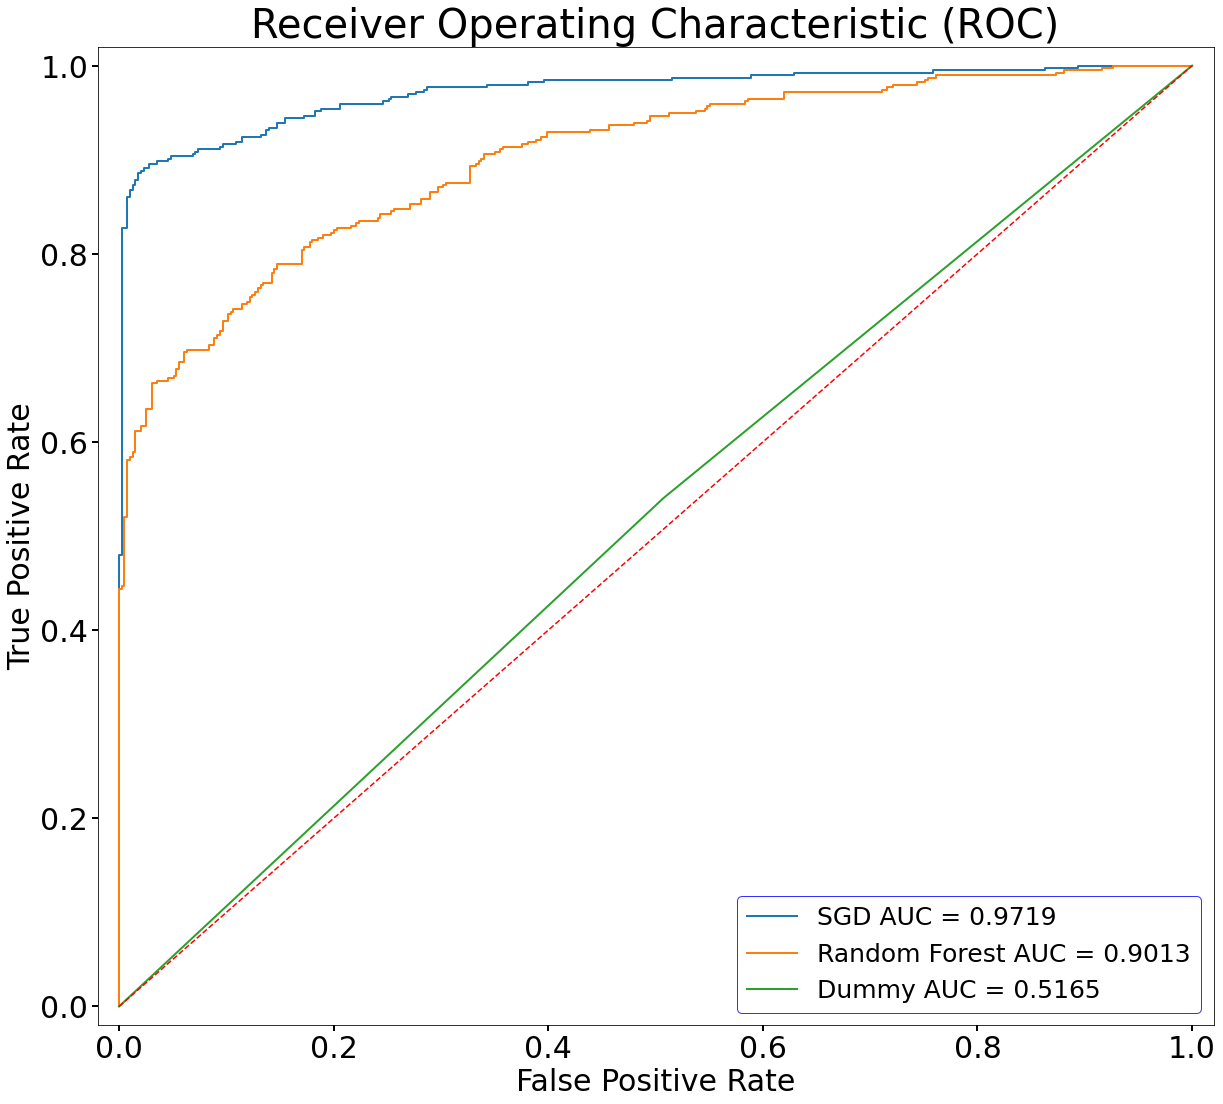

In [1231]:
roc_scores(X_rus,y_rus)

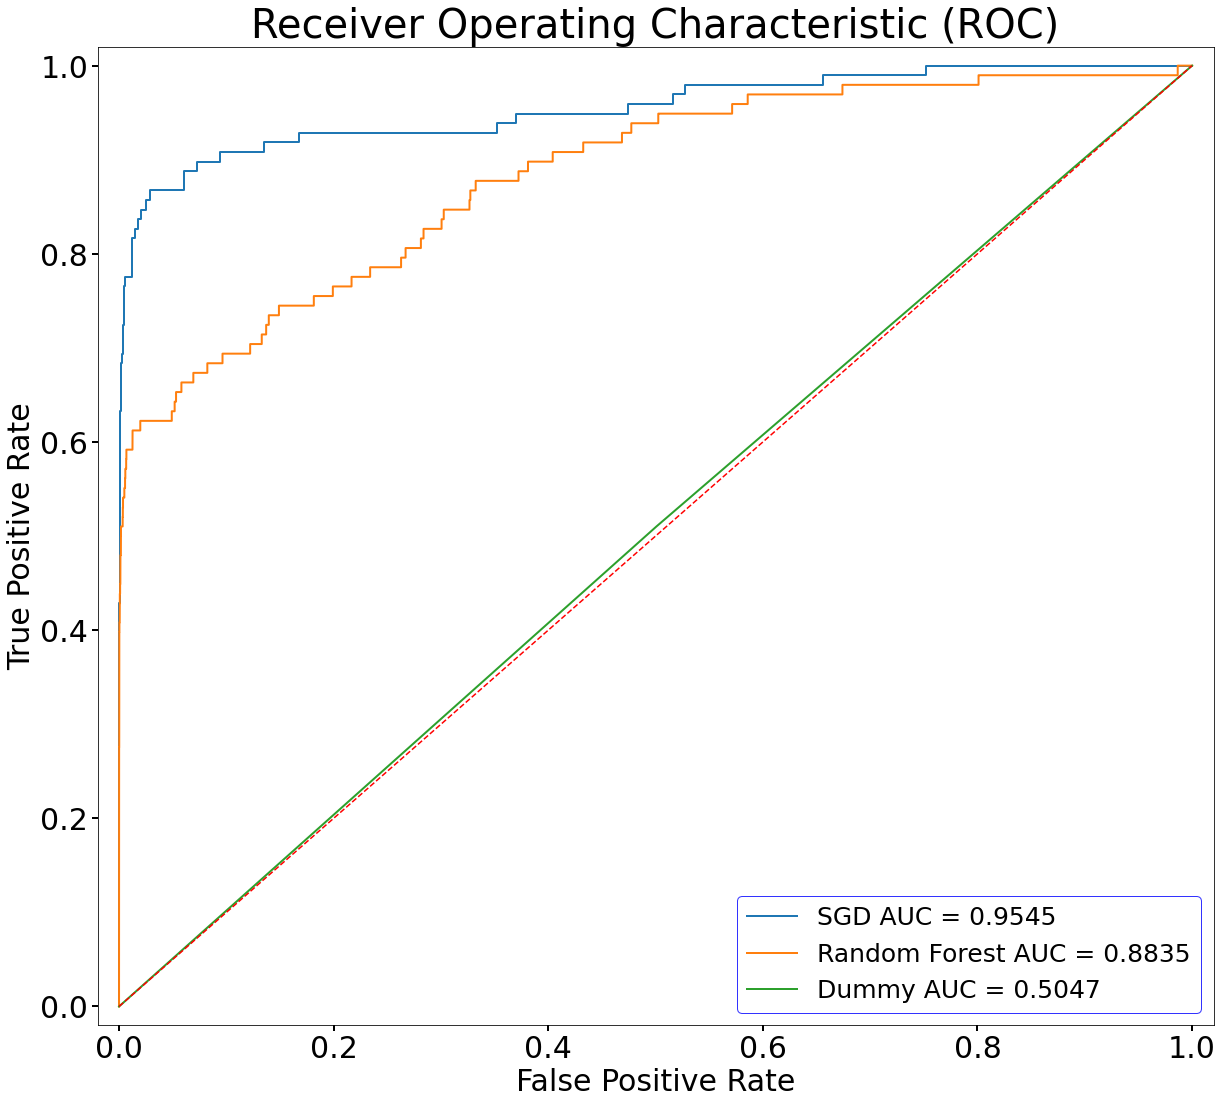

In [1232]:
X_test_std = std_scale.transform(X_test)
roc_scores(X_test_std,y_test)

# 6. Conclusion
<a id='6'></a>

We were able to accurately identify fraudulent credit card transactions using a random forest model. We found that the five variables most correlated with fraud are, in decreasing order, V17, V14, V10, V12, and V11. Only a few preprocessing steps were necessary before constructing predictive models:
* Split the data using a random, stratified train/test split with a test size of 20%
* Box-Cox power transform of the transaction amounts to remove skewness in the data
* Mean and variance standardization of all features as part of a machine learning pipeline

We used the [Matthews correlation coefficient (MCC)](https://en.wikipedia.org/wiki/Matthews_correlation_coefficient) to compare the performance of different models. In cross validation, the best linear model (logistic regression, linear SVC) achieved a cross-validated MCC score of 0.807, and a random forest achieved a cross-validated MCC score of 0.856. We therefore chose the random forest as the better model, which obtained an MCC of 0.869 on the test set.

To improve a chosen model, we searched over a grid of hyperparameters and compared performance with cross-validation. It may be possible to improve the random forest model by further tweaking the hyperparameters, given additional time and/or computational power.